In [1]:
# Imports
import pandas as pd
import glob
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import math
from wordcloud import WordCloud
import warnings
import ipywidgets as widgets
from IPython.display import display

In [2]:
# !pip install ipywidgets

### acorn_property_type

In [3]:
acorn_df=pd.read_csv('Data/10. acorn_information.csv')
acorn_df

,Acorn,Acorn Group Name,Acorn Category,Proportion of Acorn Category (%)
0,ACORN-A,Exclusive Addresses,Luxury Lifestyles,9
1,ACORN-B,Flourishing Capital,Luxury Lifestyles,33
2,ACORN-C,Upmarket Families,Luxury Lifestyles,57
3,ACORN-D,Commuter Belt Wealth,Established Affluence,75
4,ACORN-E,Prosperous Professionals,Established Affluence,25
5,ACORN-F,Mature Success,Thriving Neighbourhoods,32
6,ACORN-G,Settled Sururbia,Thriving Neighbourhoods,23
7,ACORN-H,Metropolitian Surroundings,Thriving Neighbourhoods,7
8,ACORN-I,Up-and-coming Urbanities,Thriving Neighbourhoods,7
9,ACORN-J,Aspiring Communities,Thriving Neighbourhoods,31


In [4]:
housing_df = pd.read_excel('Data/13. acorn_property_type.xlsx')
housing_df

,Acorn,Housing Type
0,ACORN-A,Mansionettes
1,ACORN-B,Flats
2,ACORN-C,Flats
3,ACORN-D,Detached
4,ACORN-E,Detached
5,ACORN-F,Detached
6,ACORN-G,Detached
7,ACORN-H,Detached
8,ACORN-I,Semi Detached
9,ACORN-J,Semi Detached


In [5]:
efficiency_df = pd.read_excel('Data/14. property_type_energy_efficiency.xlsx')
efficiency_df

,Housing Type,Current Efficiency,Potential Efficiecny,Difference
0,Detached,0.59,0.80,0.21
1,Semi Detached,0.59,0.83,0.24
2,Terraced,0.63,0.85,0.22
3,Flats,0.72,0.79,0.07
4,Mansionettes,0.73,0.79,0.06


In [6]:
acorn_efficiency_df = pd.merge(housing_df, efficiency_df, on='Housing Type')
acorn_efficiency_df

,Acorn,Housing Type,Current Efficiency,Potential Efficiecny,Difference
0,ACORN-A,Mansionettes,0.73,0.79,0.06
1,ACORN-B,Flats,0.72,0.79,0.07
2,ACORN-C,Flats,0.72,0.79,0.07
3,ACORN-D,Detached,0.59,0.80,0.21
4,ACORN-E,Detached,0.59,0.80,0.21
5,ACORN-F,Detached,0.59,0.80,0.21
6,ACORN-G,Detached,0.59,0.80,0.21
7,ACORN-H,Detached,0.59,0.80,0.21
8,ACORN-I,Semi Detached,0.59,0.83,0.24
9,ACORN-J,Semi Detached,0.59,0.83,0.24


### `merged_df2_df6_df10_df12_acorn.csv` & `merged_df2_df6_df_10_df12_acorn_grouped.csv`

In [7]:
merged_df2_df6_df10_df12_acorn = pd.read_csv('Merged Data/7. merged_df2_df6_df10_df12_acorn.csv')
merged_df2_df6_df10_df12_acorn = merged_df2_df6_df10_df12_acorn.loc[:, ~merged_df2_df6_df10_df12_acorn.columns.str.contains("^Unnamed:")]
merged_df2_df6_df10_df12_acorn.head()

,Datetime,Tariff,ACORN-,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,...,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q,ACORN-U
0,2013-01-01 00:00:00,Normal,NaN,0.466826,0.30416,0.277174,0.299333,0.264306,0.210693,0.220377,...,0.260122,0.441892,0.224865,0.211712,0.233504,0.188953,0.216194,0.433018,0.187334,0.268813
1,2013-01-01 00:30:00,Normal,NaN,0.412806,0.33548,0.252631,0.277084,0.242287,0.195571,0.204049,...,0.237041,0.369355,0.206598,0.207256,0.228125,0.181660,0.184369,0.405615,0.176568,0.261333
2,2013-01-01 01:00:00,Normal,NaN,0.409632,0.30792,0.247349,0.244607,0.219179,0.175882,0.188544,...,0.216592,0.333382,0.194238,0.192259,0.203812,0.164800,0.162932,0.350486,0.160375,0.266833
3,2013-01-01 01:30:00,Normal,NaN,0.389142,0.29716,0.224342,0.230512,0.203659,0.167782,0.179029,...,0.195551,0.266673,0.182689,0.169915,0.194125,0.148853,0.142728,0.282495,0.148047,0.237167
4,2013-01-01 02:00:00,Normal,NaN,0.362716,0.24264,0.219973,0.207961,0.188560,0.154153,0.159642,...,0.163592,0.218845,0.169646,0.173603,0.168804,0.130727,0.122058,0.244321,0.132749,0.232021


In [8]:
# Create a dictionary to map Acorn to Potential Efficiency
acorn_to_potential_efficiency = acorn_efficiency_df.set_index('Acorn')['Potential Efficiecny'].to_dict()

# Create new columns in merged_df2_df6_df10_df12_acorn based on potential efficiency
for acorn in acorn_to_potential_efficiency.keys():
    if acorn not in merged_df2_df6_df10_df12_acorn.columns:
        continue
    merged_df2_df6_df10_df12_acorn[f'{acorn}_Potential'] = (
    merged_df2_df6_df10_df12_acorn[acorn] *
    (acorn_efficiency_df.loc[acorn_efficiency_df['Acorn'] == acorn, 'Current Efficiency'].values[0] /
     acorn_to_potential_efficiency[acorn])
)

# Display the updated dataframe
merged_df2_df6_df10_df12_acorn.head()

,Datetime,Tariff,ACORN-,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,...,ACORN-I_Potential,ACORN-J_Potential,ACORN-K_Potential,ACORN-L_Potential,ACORN-M_Potential,ACORN-N_Potential,ACORN-O_Potential,ACORN-P_Potential,ACORN-Q_Potential,ACORN-U_Potential
0,2013-01-01 00:00:00,Normal,NaN,0.466826,0.30416,0.277174,0.299333,0.264306,0.210693,0.220377,...,0.184906,0.314116,0.159844,0.150494,0.165985,0.134316,0.153680,0.320943,0.138848,0.244994
1,2013-01-01 00:30:00,Normal,NaN,0.412806,0.33548,0.252631,0.277084,0.242287,0.195571,0.204049,...,0.168499,0.262553,0.146859,0.147326,0.162161,0.129132,0.131057,0.300632,0.130868,0.238177
2,2013-01-01 01:00:00,Normal,NaN,0.409632,0.30792,0.247349,0.244607,0.219179,0.175882,0.188544,...,0.153963,0.236982,0.138073,0.136666,0.144879,0.117147,0.115819,0.259772,0.118866,0.243190
3,2013-01-01 01:30:00,Normal,NaN,0.389142,0.29716,0.224342,0.230512,0.203659,0.167782,0.179029,...,0.139006,0.189563,0.129863,0.120783,0.137992,0.105811,0.101457,0.209379,0.109729,0.216152
4,2013-01-01 02:00:00,Normal,NaN,0.362716,0.24264,0.219973,0.207961,0.188560,0.154153,0.159642,...,0.116288,0.155565,0.120592,0.123405,0.119993,0.092926,0.086764,0.181085,0.098390,0.211462


In [9]:
merged_df2_df6_df10_df12_acorn[["ACORN-A","ACORN-A_Potential"]]

,ACORN-A,ACORN-A_Potential
0,0.466826,0.431371
1,0.412806,0.381454
2,0.409632,0.378521
3,0.389142,0.359587
4,0.362716,0.335168
...,...,...
17515,0.647426,0.598254
17516,0.580851,0.536736
17517,0.529085,0.488901
17518,0.524582,0.484740


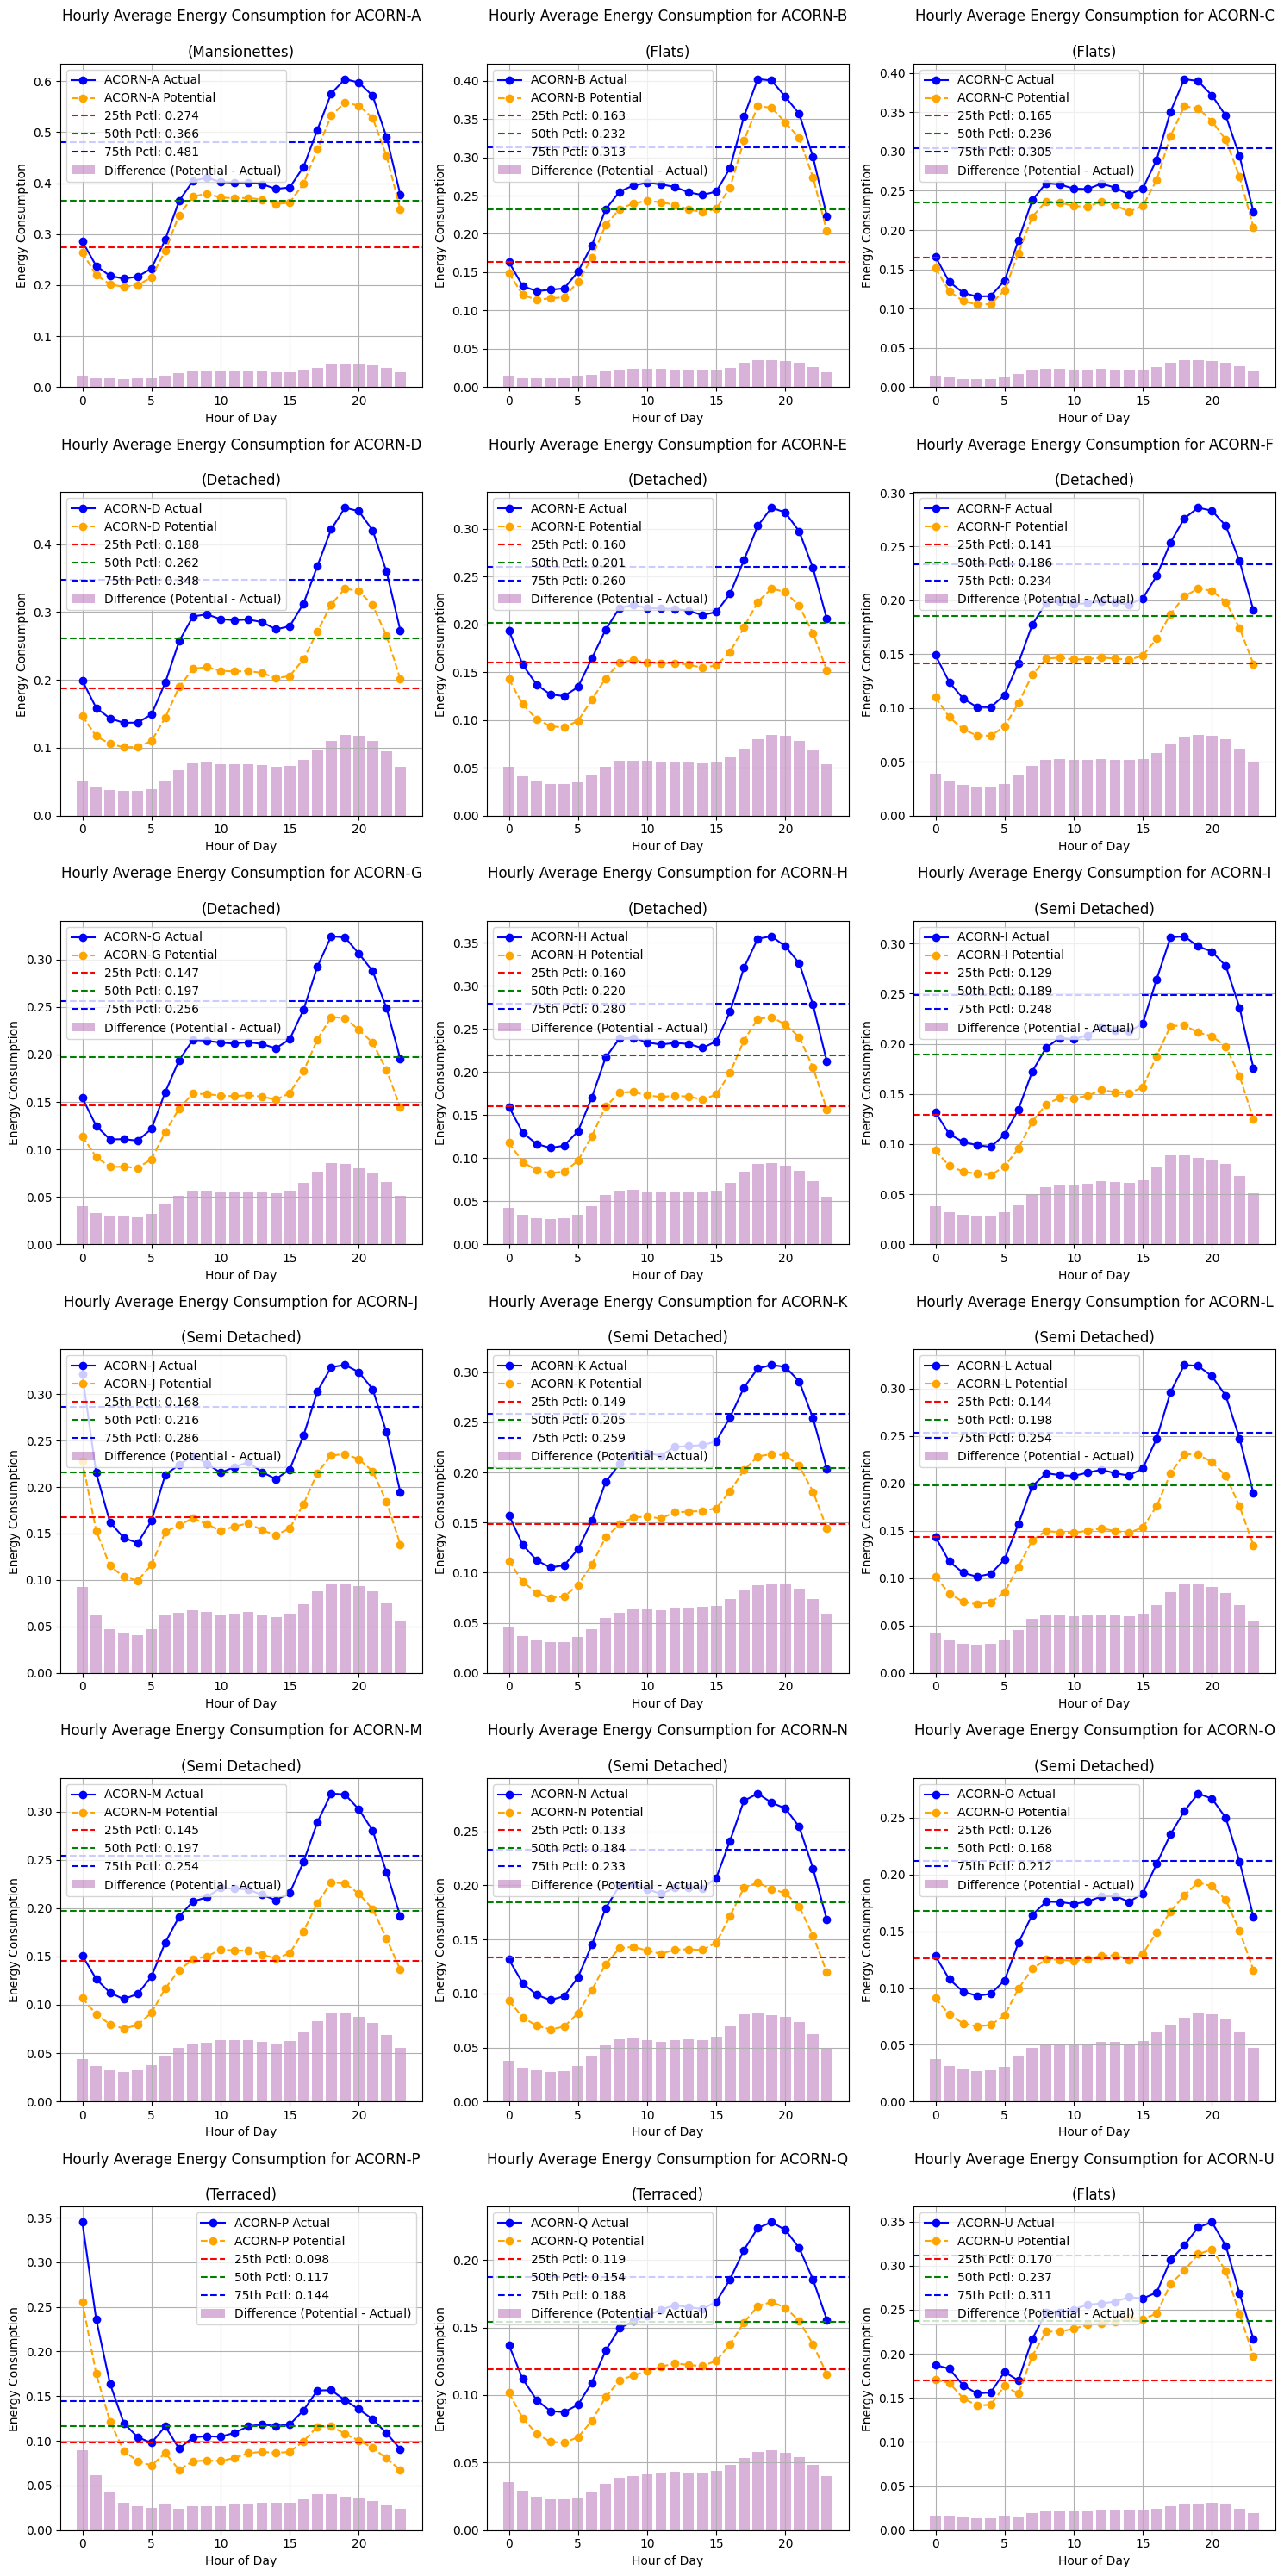

In [13]:
# Ensure 'Datetime' column is present and convert to datetime format
if 'Datetime' not in merged_df2_df6_df10_df12_acorn.columns:
    merged_df2_df6_df10_df12_acorn['Datetime'] = merged_df2_df6_df10_df12_acorn.index
else:
    merged_df2_df6_df10_df12_acorn['Datetime'] = pd.to_datetime(merged_df2_df6_df10_df12_acorn['Datetime'])

# Filter Acorn groups that are present in merged_df2_df6_df10_df12_acorn
acorn_groups_present = [group for group in acorn_to_potential_efficiency.keys() if group in merged_df2_df6_df10_df12_acorn.columns]
merged_df2_df6_df10_df12_acorn['hour'] = merged_df2_df6_df10_df12_acorn['Datetime'].dt.hour  # Extract hour of day

# Number of Acorn groups present
num_acorn_groups_present = len(acorn_groups_present)
cols = 3
rows = math.ceil(num_acorn_groups_present / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot each Acorn group
for i, acorn_group in enumerate(acorn_groups_present):
    hourly_avg = merged_df2_df6_df10_df12_acorn.groupby('hour')[acorn_group].mean().reset_index()
    hourly_potential_avg = merged_df2_df6_df10_df12_acorn.groupby('hour')[f'{acorn_group}_Potential'].mean().reset_index()

    # Calculate the difference
    hourly_diff = hourly_avg[acorn_group] - hourly_potential_avg[f'{acorn_group}_Potential'] 

    percentiles = merged_df2_df6_df10_df12_acorn[acorn_group].quantile([0.25, 0.5, 0.75])

    # Plot actual and potential averages
    axes[i].plot(hourly_avg['hour'], hourly_avg[acorn_group], label=f'{acorn_group} Actual', marker='o', color='blue')
    axes[i].plot(hourly_potential_avg['hour'], hourly_potential_avg[f'{acorn_group}_Potential'], label=f'{acorn_group} Potential', marker='o', linestyle='--', color='orange')

    # Plot the difference as a bar plot or line
    axes[i].bar(hourly_avg['hour'], hourly_diff, alpha=0.3, color='purple', label='Difference (Potential - Actual)')

    # Plot percentile lines
    axes[i].axhline(percentiles.loc[0.25], color='red', linestyle='--', label=f'25th Pctl: {percentiles.loc[0.25]:.3f}')
    axes[i].axhline(percentiles.loc[0.5], color='green', linestyle='--', label=f'50th Pctl: {percentiles.loc[0.5]:.3f}')
    axes[i].axhline(percentiles.loc[0.75], color='blue', linestyle='--', label=f'75th Pctl: {percentiles.loc[0.75]:.3f}')

    # Get housing type for the current acorn group
    housing_type = housing_df[housing_df['Acorn'] == acorn_group]['Housing Type'].values[0]

    # Formatting
    axes[i].set_title(f'Hourly Average Energy Consumption for {acorn_group}\n\n({housing_type})')

    axes[i].set_xlabel('Hour of Day')
    axes[i].set_ylabel('Energy Consumption')
    axes[i].legend()
    axes[i].grid(True)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


* Households where the difference between actual and potential energy consumption is very high, can be targeted for energy efficiency programs. Adjust tarrifs or offer incentives to upgrade their housing?

If you've analyzed the **actual vs. potential energy consumption** for each **ACORN group** on an **hourly basis**, you can use this insight to answer Business Question #1 ("How can tariff pricing be optimised based on ACORN consumption patterns to ensure affordability for lower-income households while ensuring energy savings?") in the following ways:

---

## 🎯 **1. Identify Peak and Off-Peak Differences Across ACORN Groups**  
### Insight:  
- If certain ACORN groups (e.g., low-income detached houses) have higher potential savings during peak hours, it means they could benefit more from shifting consumption to off-peak times.  

### Strategy:  
✅ **Introduce Time-of-Use (ToU) tariffs**:  
- Offer discounted rates during off-peak hours to encourage load shifting.  
- Focus ToU incentives on groups with high hourly discrepancies between actual and potential consumption.  

✅ **Example:**  
- If low-income detached houses have a high hourly discrepancy during peak hours → Encourage them to shift energy use to off-peak hours by introducing a discounted ToU rate.  

---

## 🏡 **2. Target Tariff Adjustments Based on Group Efficiency Potential**  
### Insight:  
- If lower-income groups have larger gaps between actual and potential efficiency → They may benefit more from tariff adjustments or energy-saving programs.  

### Strategy:  
✅ **Create tiered tariffs** based on efficiency potential:  
- For households with high potential savings, offer incentives for energy-saving upgrades (e.g., insulation, smart thermostats).  
- Adjust baseline tariff rates based on the efficiency gap to reduce energy costs for low-income households.  

✅ **Example:**  
| ACORN Group | Actual Usage | Potential Usage | Gap | Tariff Strategy |
|-------------|--------------|----------------|-----|-----------------|
| Low-Income Detached | 50 kWh | 35 kWh | High | Discounted off-peak rates + insulation rebate |
| High-Income Flat | 30 kWh | 28 kWh | Low | No adjustment needed |

---

## 🔄 **3. Design Dynamic Pricing Based on Hourly Trends**  
### Insight:  
- If some ACORN groups have consistent high actual-to-potential gaps at specific times of day → Use dynamic pricing to reflect this pattern.  

### Strategy:  
✅ **Introduce hourly dynamic tariffs:**  
- Reduce rates during hours when actual-to-potential gaps are low (indicating high efficiency).  
- Increase rates during high-usage hours to encourage shifting of consumption to more efficient periods.  

✅ **Example:**  
- If actual usage exceeds potential during 6–9 PM → Higher tariff during this period to discourage overconsumption.  
- If actual usage is close to potential during 10 AM–3 PM → Lower tariff during this period to encourage usage at efficient times.  

---

## 🌍 **4. Improve Targeted Energy-Saving Programs**  
### Insight:  
- If specific ACORN groups show a large efficiency gap → Structural improvements (e.g., insulation, heating systems) could close the gap.  

### Strategy:  
✅ **Introduce targeted energy-saving programs:**  
- Focus rebates and efficiency improvements on groups with high efficiency gaps.  
- Encourage participation through tariff reductions for households that implement efficiency upgrades.  

✅ **Example:**  
- High efficiency gap in rural detached homes → Provide insulation rebates.  
- Medium gap in urban flats → Offer smart thermostat upgrades.  

---

## 📊 **5. Improve Tariff Fairness and Affordability**  
### Insight:  
- If lower-income groups have high gaps due to poor insulation or inefficient heating → Tariffs could be adjusted to avoid penalizing structural inefficiencies.  

### Strategy:  
✅ **Introduce a baseline allowance:**  
- Higher allowance for low-income, inefficient homes to ensure affordability.  
- Introduce energy-saving incentives tied to tariff discounts.  

✅ **Example:**  
- Low-income detached house with high efficiency gap → Higher baseline consumption limit before peak charges apply.  
- High-income flat with small efficiency gap → Standard rates without extra baseline allowances.  

---

## 🚀 **Outcome:**  
✅ **Lower Costs for Lower-Income Households:**  
- Adjust tariffs based on efficiency potential to ensure affordability.  

✅ **Increased Energy Savings:**  
- Encourage shifting consumption to efficient times and reducing structural inefficiencies.  

✅ **Better Grid Management:**  
- Time-based tariffs reduce peak load and improve grid stability.  

✅ **Policy Impact:**  
- Tariffs that reflect structural inefficiencies help avoid penalizing disadvantaged households.  

---

### 🔑 **Example Strategy Based on Hourly Patterns:**  

| Time Slot | ACORN Group | Actual Usage | Potential Usage | Tariff Strategy |
|-----------|-------------|--------------|----------------|-----------------|
| 6–9 PM (Peak) | Low-Income Detached | 5 kWh | 3 kWh | Increase tariff to shift demand + rebate for smart heating system |
| 10 AM–3 PM (Off-Peak) | High-Income Flat | 2 kWh | 1.8 kWh | Lower tariff to reflect high efficiency |
| 7–10 AM | Low-Income Terraced | 4 kWh | 3.2 kWh | Introduce ToU tariff + encourage energy-saving improvements |

---

### ✅ **Final Answer:**  
By analyzing hourly differences between actual and potential consumption for each ACORN group, you can:  
- **Set dynamic pricing** to reflect hourly efficiency gaps.  
- **Target structural inefficiencies** with energy-saving programs.  
- **Introduce fairer tariff structures** that avoid penalizing low-income groups for poor insulation or outdated heating systems.  
- **Reduce overall energy consumption** while improving affordability for disadvantaged households.